# Classification: Decision Tree

## Data import

In [2]:
#IMPORT DATA
import pandas as pd
import numpy as np
data_train = pd.read_csv('train.csv')
data_test=pd.read_csv('test.csv')

In [3]:
#basic statistic details about the data

data_train.describe(include="all")

,Retained,ID_SALES,Program_Code,Travel_Type,SPR_Product_Type,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,MajorProgramCode,Poverty_Code,...,FRP_Take_up_percent_,EZ_Pay_Take_Up_Rate,SPR_Group_Revenue,FPP_to_PAX,pol_mean,sub_mean,twl_mean,numTweets,totPaxDiff,depositToDeparture
count,3229.000000,3229,3229,3229,3229,3229,3229,3229,3229,3229,...,3229.000000,3229.000000,3229.000000,3229.000000,3229.000000,3229.000000,3229.000000,3229.000000,3229.000000,3229.000000
unique,NaN,3137,5,2,4,6,4,13,4,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,HD1042T,CN|HD,air,East Coast,Middle,Middle,Middle->Middle,H,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,1909,2661,2682,1666,2402,1465,2753,1298,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.611644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.567126,0.209859,1593.159208,0.901182,0.059056,0.346663,48.949030,3.054196,-0.176835,195.345928
std,0.487452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.232677,0.161110,669.146409,0.056090,0.284144,0.267200,14.273453,0.257186,5.836794,49.331680
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,73.000000,0.608229,-1.000000,0.000000,0.000000,0.000000,-43.000000,-149.000000
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.451581,0.100512,1070.000000,0.873556,-0.016667,0.066667,39.333333,3.000000,-2.000000,162.000000
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.595420,0.192580,1679.000000,0.907843,0.000000,0.333333,49.666667,3.000000,0.000000,197.000000
75%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.724460,0.296565,2055.000000,0.937686,0.200000,0.559722,59.333333,3.000000,2.000000,225.000000


## Basic Data Preparation

In [4]:
#Separate X and y (explanatory variables and target variable in train set)
X_train = data_train.iloc[:,2:]
column_names = list(X_train) 
Y_train = data_train.iloc[:,0] 
del X_train['Retained_class']
X_train.head()

,Program_Code,Travel_Type,SPR_Product_Type,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,MajorProgramCode,Poverty_Code,Region,CRM_Segment,...,FRP_Take_up_percent_,EZ_Pay_Take_Up_Rate,SPR_Group_Revenue,FPP_to_PAX,pol_mean,sub_mean,twl_mean,numTweets,totPaxDiff,depositToDeparture
0,other,air,East Coast,PK,Middle,PK->Middle,C,other,Northern California,9,...,0.570244,0.119431,2708.000000,0.888166,0.000000,0.000000,31.333333,3,2,190.000000
1,other,air,East Coast,K,Middle,K->Middle,C,other,other,other,...,0.510360,0.190362,1250.605592,1.000000,0.000000,0.000000,0.000000,0,1,199.424613
2,other,air,East Coast,PK,Middle,PK->Middle,C,other,Northern California,5,...,0.623850,0.274595,2518.000000,0.929941,0.966667,0.400000,34.333333,3,-13,164.000000
3,other,air,East Coast,PK,Middle,PK->Middle,C,other,Northern California,5,...,0.592224,0.262095,2505.000000,0.894531,0.933333,0.733333,57.666667,3,-1,162.000000
4,other,air,East Coast,PK,Middle,PK->Middle,C,other,Northern California,9,...,0.571137,0.088141,2569.000000,0.850497,0.000000,0.200000,54.333333,3,-4,195.000000


In [5]:
#Separate X and y (explanatory variables and target variable in test set)
X_test = data_test.iloc[:,2:]
column_names = list(X_test) 
Y_test = data_test.iloc[:,0] 
del X_test['Retained_class']
X_test.head()

,Program_Code,Travel_Type,SPR_Product_Type,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,MajorProgramCode,Poverty_Code,Region,CRM_Segment,...,FRP_Take_up_percent_,EZ_Pay_Take_Up_Rate,SPR_Group_Revenue,FPP_to_PAX,pol_mean,sub_mean,twl_mean,numTweets,totPaxDiff,depositToDeparture
0,other,air,East Coast,K,High,K->High,C,other,Southern California,10,...,0.345746,0.103222,2167.0,0.991415,0.766667,0.829167,62.000000,3,-2,320.0
1,other,air,East Coast,PK,Middle,PK->Middle,C,other,Southern California,11,...,0.404058,0.104028,2148.0,0.915161,1.000000,0.533333,44.666667,3,4,213.0
2,other,air,East Coast,K,Middle,K->Middle,C,other,Pacific Northwest,1,...,0.517738,0.000000,1989.0,0.866585,1.000000,1.000000,23.000000,3,1,139.0
3,other,air,East Coast,Middle,Middle,Middle->Middle,C,other,Southern California,5,...,0.721320,0.381479,2388.0,0.887128,0.000000,0.000000,50.000000,3,-12,399.0
4,other,air,East Coast,K,Middle,K->Middle,C,other,Southern California,5,...,0.492463,0.168508,2360.0,0.957977,0.700000,0.800000,23.000000,4,-4,207.0


In [6]:
X_train=pd.get_dummies(X_train,columns=X_train.columns[:31])

In [7]:
X_test=pd.get_dummies(X_test,columns=X_test.columns[:31])

In [8]:
missing_cols = set( X_train.columns ) - set( X_test.columns )
#Add a missing column in test set with default value equal to 0
for c in missing_cols:
    X_test[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
X_test = X_test[X_train.columns]

## The Decision Tree Model

In [9]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=4, min_samples_leaf=2)

model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

# criterion : "gini", "entropy"
# max_depth : The maximum depth of the tree.
# min_samples_split : The minimum number of samples required to split an internal node:
# min_samples_leaf : The minimum number of samples required to be at a leaf node. 

In [10]:
y_pred

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [11]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, y_pred))

[[275 143]
 [ 29 629]]


In [12]:
#DEFINE CLASSIFIER and THE PARAMETERS GRID
from sklearn.tree import DecisionTreeClassifier
import numpy as np

classifier = DecisionTreeClassifier()
parameters = {'criterion': ['entropy','gini'], 
              'max_depth': [3,4,5,100],
              'min_samples_split': [5,10,3],
              'min_samples_leaf': [2,1]}

In [13]:
#DEFINE the GRIDSEARCH 
'''
GS perfoms an exhaustive search over specified parameter values for an estimator.
GS uses a Stratified K-Folds cross-validator
(The folds are made by preserving the percentage of samples for each class.)
If refit=True the model is retrained on the whole training set with the best found params
'''
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=10, n_jobs=-1, refit=True)

In [14]:
#TRAIN the CLASSIFIER
gs = gs.fit(X_train, Y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   28.0s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:   30.2s finished


In [14]:
#summarize the results of GRIDSEARCH
print('***GRIDSEARCH RESULTS***')

print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

***GRIDSEARCH RESULTS***
Best score: 0.637183 using {'criterion': 'entropy', 'max_depth': 100, 'min_samples_leaf': 2, 'min_samples_split': 5}
0.579819 (0.282574) with: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5}
0.579819 (0.282574) with: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10}
0.579819 (0.282574) with: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 3}
0.579819 (0.282574) with: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5}
0.579819 (0.282574) with: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10}
0.579819 (0.282574) with: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 3}
0.586101 (0.272746) with: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 5}
0.586101 (0.272746) with: {'criterion': 'entropy', 'max_de

In [15]:
#TEST ON the TEST SET 
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

In [16]:
#This is the prediction on the TEST SET
y_pred

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [17]:
#EVALUATE THE PREDICTION (on the y_test)
from sklearn import metrics
print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(Y_test, y_pred))

***RESULTS ON TEST SET***
f1_score:  0.8685015290519879


In [18]:
#PRINT SOME FURTHER METRICS
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80       418
           1       0.87      0.86      0.87       658

    accuracy                           0.84      1076
   macro avg       0.83      0.83      0.83      1076
weighted avg       0.84      0.84      0.84      1076



In [19]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, y_pred))

[[336  82]
 [ 90 568]]


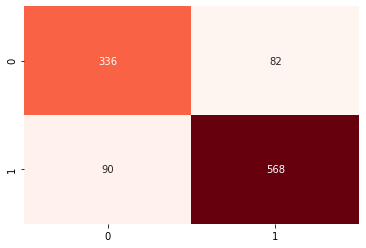

In [20]:
# Plot confusion matrix
import seaborn as sns
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, fmt='d', cmap="Reds", cbar=False);




### ROC Curve

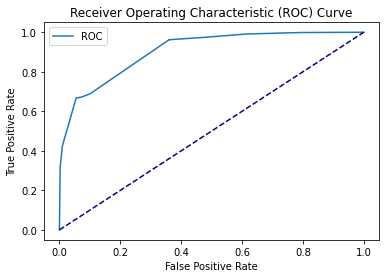

AUC: 0.91


In [21]:
from sklearn import metrics
model = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=2, min_samples_split=5)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds=metrics.roc_curve(Y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(Y_test, y_probs[:,1])
print('AUC: %.2f' % auc)

## Plotting the tree 

In [22]:
X_train.columns.tolist()

['Days',
 'Total_Pax',
 'FPP_to_School_enrollment',
 'MDR_Low_Grade',
 'MDR_High_Grade',
 'Total_School_Enrollment',
 'NumberOfMeetingswithParents',
 'DifferenceTraveltoFirstMeeting',
 'DifferenceTraveltoLastMeeting',
 'FRP_Cancelled',
 'FRP_Take_up_percent_',
 'EZ_Pay_Take_Up_Rate',
 'SPR_Group_Revenue',
 'FPP_to_PAX',
 'pol_mean',
 'sub_mean',
 'twl_mean',
 'numTweets',
 'totPaxDiff',
 'depositToDeparture',
 'Program_Code_CD|HN',
 'Program_Code_CN|HD',
 'Program_Code_HC',
 'Program_Code_HS',
 'Program_Code_other',
 'Travel_Type_air',
 'Travel_Type_ground',
 'SPR_Product_Type_CA History',
 'SPR_Product_Type_East Coast',
 'SPR_Product_Type_Science',
 'SPR_Product_Type_other',
 'GroupGradeTypeLow_Elementary',
 'GroupGradeTypeLow_High',
 'GroupGradeTypeLow_K',
 'GroupGradeTypeLow_Middle',
 'GroupGradeTypeLow_PK',
 'GroupGradeTypeLow_other',
 'GroupGradeTypeHigh_Elementary',
 'GroupGradeTypeHigh_High',
 'GroupGradeTypeHigh_Middle',
 'GroupGradeTypeHigh_other',
 'GroupGradeType_Elementary-

In [23]:
from sklearn import tree
r = tree.export_text(model,feature_names=X_test.columns.tolist())
print(r)



|--- pol_mean <= -0.01
|   |--- pol_mean <= -0.18
|   |   |--- depositToDeparture <= 319.00
|   |   |   |--- Program_Code_CN|HD <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- Program_Code_CN|HD >  0.50
|   |   |   |   |--- class: 0
|   |   |--- depositToDeparture >  319.00
|   |   |   |--- class: 1
|   |--- pol_mean >  -0.18
|   |   |--- DifferenceTraveltoLastMeeting <= 227.62
|   |   |   |--- Total_Pax <= 51.50
|   |   |   |   |--- class: 0
|   |   |   |--- Total_Pax >  51.50
|   |   |   |   |--- class: 1
|   |   |--- DifferenceTraveltoLastMeeting >  227.62
|   |   |   |--- initDayOfWeek_Sat <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- initDayOfWeek_Sat >  0.50
|   |   |   |   |--- class: 1
|--- pol_mean >  -0.01
|   |--- pol_mean <= 0.09
|   |   |--- Program_Code_HC <= 0.50
|   |   |   |--- SPR_Product_Type_East Coast <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- SPR_Product_Type_East Coast >  0.50
|   |   |   |   |--- class: 1
|   |   |--- Program_Code_HC 

[Text(152.45357142857142, 195.696, 'X[14] <= -0.007\ngini = 0.475\nsamples = 3229\nvalue = [1254, 1975]'),
 Text(65.76428571428572, 152.208, 'X[14] <= -0.18\ngini = 0.233\nsamples = 846\nvalue = [732, 114]'),
 Text(35.871428571428574, 108.72, 'X[19] <= 319.0\ngini = 0.037\nsamples = 423\nvalue = [415, 8]'),
 Text(23.914285714285715, 65.232, 'X[21] <= 0.5\ngini = 0.028\nsamples = 420\nvalue = [414, 6]'),
 Text(11.957142857142857, 21.744, 'gini = 0.0\nsamples = 318\nvalue = [318, 0]'),
 Text(35.871428571428574, 21.744, 'gini = 0.111\nsamples = 102\nvalue = [96, 6]'),
 Text(47.82857142857143, 65.232, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(95.65714285714286, 108.72, 'X[8] <= 227.623\ngini = 0.376\nsamples = 423\nvalue = [317, 106]'),
 Text(71.74285714285715, 65.232, 'X[1] <= 51.5\ngini = 0.461\nsamples = 211\nvalue = [135, 76]'),
 Text(59.785714285714285, 21.744, 'gini = 0.42\nsamples = 177\nvalue = [124, 53]'),
 Text(83.7, 21.744, 'gini = 0.438\nsamples = 34\nvalue = [11, 23]

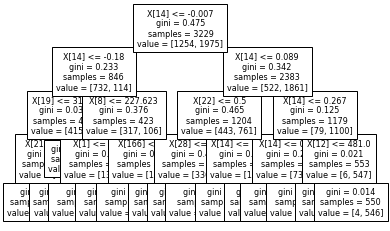

In [24]:
tree.plot_tree(model, fontsize=8)

In [25]:
from sklearn import metrics

print("MAE train: ", metrics.mean_absolute_error(Y_train, model.predict(X_train))) 
print("MSE train: ",metrics.mean_squared_error(Y_train, model.predict(X_train)))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(Y_train, model.predict(X_train))))
print("r2: ",np.sqrt(metrics.r2_score(Y_train, model.predict(X_train))))

print("MAE test: ", metrics.mean_absolute_error(Y_test, model.predict(X_test))) 
print("MSE test: ",metrics.mean_squared_error(Y_test, model.predict(X_test)))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(Y_test, model.predict(X_test))))
print("r2: ",np.sqrt(metrics.r2_score(Y_test, model.predict(X_test))))

MAE train:  0.15980179622174048
MSE train:  0.15980179622174048
RMSE train:  0.3997521685016111
r2:  0.5720584966825274
MAE test:  0.16356877323420074
MSE test:  0.16356877323420074
RMSE test:  0.40443636487610846
r2:  0.5580951216178441
